In [1]:
import datetime as dt
import praw
import sqlite3
from psaw import PushshiftAPI

r = praw.Reddit(client_id='HlYts3NFqdglCA',
                client_secret='oVVLkbXLK-xbb7X85fuH6WeFxPI',
               user_agent='umdcs_vim')
api = PushshiftAPI(r)

start_epoch = int(dt.datetime(2018, 10, 1).timestamp())
results = list(api.search_submissions(after=start_epoch,
                                      subreddit='UMD',
                                      filter=['url','author', 'title', 'subreddit'],
                                      limit=5))
print(len(results))

for res in results :
    print(str(res.author) + ": " + str(res.created_utc)) # USER TABLE
    print(str(res.id) + ": " + res.url + " " + res.title + ": " + res.selftext + " SCORE" + str(res.score) + " UTC" + str(res.created_utc))

    
# print(results[4].comments.list()[0].author_flair_text)

# for i in range(20) :
#     print(str(results[i].link_flair_text))

# print(str(results[i].link_flair_text) for i in range(20))
# print(results[3].title)


# print([x.subreddit for x in results[1].author.comments.new(limit=None)])

# #print([x.body for x in results[9943].comments.list()][1])




5
ddisposable3: 1574038655.0
dxvoen: https://www.reddit.com/r/UMD/comments/dxvoen/umd_italian_club/ Umd italian club?: How active is it? Where can i find info?

Thx SCORE1 UTC1574038655.0
scaramouch_fandango: 1574036117.0
dxv5bc: https://www.reddit.com/r/UMD/comments/dxv5bc/tool_concert_1125/ Tool Concert 11/25: Any fellow Terps want to see Maynard and Co. next Monday? SCORE1 UTC1574036117.0
cb7131006: 1574035933.0
dxv3yn: https://www.reddit.com/r/UMD/comments/dxv3yn/comm_pr_or_public_health_fs/ COMM PR or Public Health FS?: I'm trying to decide on my major and I'm unsure if I should go into the PR track for COMM or do Family Sciences in the School of Public Health. I originally was going to do PR and have started some COMM classes for it, but Family Sciences seems more interesting with the potential careers post grad so I'm unsure at this point.

 Does anyone have pros or cons for either? What about the workload/classes for these majors? Any extra info would be very helpful SCORE1 UTC

In [4]:
import sqlite3
from sqlite3 import Error
import pandas as pd

def create_connection(db_file):
    # create a database connection to the SQLite database specified by db_file
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

def create_table(conn, create_table_sql):
    # create a table from the create_table_sql statement
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [65]:
sql_create_user_table = """ CREATE TABLE IF NOT EXISTS User (
                                    name text PRIMARY KEY,
                                    flair text,
                                    created_utc float NOT NULL
                                ); """

sql_create_user_subreddits_table = """ CREATE TABLE IF NOT EXISTS UserSubreddits (
                                    name text,
                                    subreddit text,
                                    FOREIGN KEY (name) references User (name)
                                ); """

sql_create_post_table = """CREATE TABLE IF NOT EXISTS Post (
                                id text PRIMARY KEY,
                                name text NOT NULL,
                                url text,
                                title text,
                                selftext text,
                                score integer NOT NULL,
                                created_utc float NOT NULL,
                                permalink text,
                                link_flair_text text,
                                FOREIGN KEY (name) REFERENCES User (name)
                            );"""

sql_create_comment_table = """CREATE TABLE IF NOT EXISTS Comment (
                                id text PRIMARY KEY,
                                name text NOT NULL,
                                body text,
                                score integer NOT NULL,
                                parent_id text NOT NULL,
                                link_id text NOT NULL,
                                created_utc float NOT NULL,
                                FOREIGN KEY (name) REFERENCES User (name),
                                FOREIGN KEY (parent_id) REFERENCES Comment (id),
                                FOREIGN KEY (link_id) REFERENCES Post (id)
                            );"""

# create a database connection
conn = create_connection("./R_UMD.db")

# create tables
if conn is not None:
    #create_table(conn, sql_create_user_table)
    #create_table(conn, sql_create_user_subreddits_table)
    #create_table(conn, sql_create_post_table)
    create_table(conn, sql_create_comment_table)
    conn.close()
else:
    print("Error! cannot create the database connection.")

In [51]:
# create a database connection
conn = create_connection("./R_UMD.db")

# create tables
if conn is not None:
    start_epoch = int(dt.datetime(2010, 1, 1).timestamp())
    results = list(api.search_submissions(before=int(1402689176.0),
                                          subreddit='UMD',
                                          filter=['url','author', 'title', 'subreddit'],
                                          limit=80))
    print(len(results))

    for res in results :
        user_task = (str(res.author), res.created_utc) 
        
        user_sql = ''' INSERT or IGNORE INTO User(name,created_utc)
              VALUES(?,?) '''
        
        post_task = (res.id, str(res.author), res.url, res.title, str(res.selftext), res.score, res.created_utc, str(res.permalink), str(res.link_flair_text))

        post_sql = ''' INSERT or IGNORE INTO Post(id,name,url,title,selftext,score,created_utc,permalink,link_flair_text)
              VALUES(?,?,?,?,?,?,?,?,?) '''
        
        cur = conn.cursor()
        try :
            cur.execute(user_sql, user_task)
            cur.execute(post_sql, post_task)
        except :
            cur.close()
            conn.close()
            
        conn.commit()
     
    conn.close()
else:
    print("Error! cannot create the database connection.")

5263


In [209]:
conn = create_connection("./R_UMD.db")

import pandas as pd

df = pd.read_sql("SELECT * FROM User", conn)

conn.close()
df['created_utc'][df['created_utc'].size-2]
df

,name,flair,created_utc
0,Baking-and-books,None,1.574036e+09
1,cdrgnvrk,None,1.574035e+09
2,TonyChen616,:MTestudo: Comp Sci 22,1.574035e+09
3,Shalleycat,'20 Community Health,1.574032e+09
4,Rooser1212,None,1.574030e+09
5,ddisposable3,None,1.574039e+09
6,scaramouch_fandango,None,1.574036e+09
7,cb7131006,None,1.574036e+09
8,bambiambi313,None,1.574028e+09
9,luke_g3,None,1.574028e+09


In [175]:
# create a database connection
conn = create_connection("./R_UMD.db")
df = pd.read_sql("SELECT * FROM Post", conn)
l = []
# create tables
if conn is not None :
    
    for i, row in df.iterrows() :
        if (i >= 13875 and i <= 25682) :
            sub = r.submission(id=row['id'])
            #print(sub)
            comment_list = sub.comments.list()
            for comment in comment_list :
                try :
                    #comment_task = (str(comment.id), str(comment.author), comment.body, comment.score, comment.parent_id, comment.link_id, comment.created_utc) 

                    #comment_sql = ''' INSERT or IGNORE INTO Comment(id,name,body,score,parent_id,link_id,created_utc)
                    #      VALUES(?,?,?,?,?,?,?) '''
                    
                    user_task = (str(comment.author), comment.author.created_utc)
                    
                    user_sql = ''' INSERT or IGNORE INTO User(name,created_utc)
                          VALUES(?,?) '''
                    
                    #print(str(coment.author_flair_text))
                    
                    flair_task = (str(comment.author_flair_text), str(comment.author))
                    
                    flair_sql = ''' UPDATE User SET flair=(?) WHERE name=(?)'''

                    cur = conn.cursor()

#                     cur.execute(comment_sql, comment_task)
#                     cur.execute(user_sql, user_task)
#                     cur.execute(flair_sql, flair_task)
                    
                    try :
                        #cur.execute(comment_sql, comment_task)
                        cur.execute(user_sql, user_task)
                        cur.execute(flair_sql, flair_task)
                    except Exception as e:
                       #print(e)
                        cur.close()
                        conn.close()

                    conn.commit()
                    l.append(i)
                except Exception as e:
                    #print(e)
                    pass
            if (i % 1000 == 0) :
                print("iteration " + str(i))

    conn.close()
else:
    print("Error! cannot create the database connection.")

iteration 14000
iteration 15000
iteration 16000
iteration 17000
iteration 18000
iteration 19000
iteration 20000
iteration 21000
iteration 22000
iteration 23000
iteration 24000
iteration 25000


In [235]:
# create a database connection
conn = create_connection("./R_UMD.db")
df = pd.read_sql("SELECT * FROM User", conn)
l = []
# create tables
if conn is not None :
    
    for i, row in df.iterrows() :
        if (i >= 11215) :
            red = r.redditor(row['name'])
            try :
                for x in red.comments.new(limit=None) :
                    try :
                        subreddit_task = (row['name'], str(x.subreddit)) 

                        subreddit_sql = ''' INSERT or IGNORE INTO UserSubreddits(name,subreddit)
                              VALUES(?,?) '''

                        cur = conn.cursor()

                        try :
                            cur.execute(subreddit_sql, subreddit_task)
                        except :
                            cur.close()
                            conn.close()

                        l.append(i)
                    except:
                        pass
            except:
                i = i + 1
                print("skipping" + str(i))

            conn.commit()
            if (i % 1000 == 0) :
                print("iteration " + str(i))

    conn.close()
else:
    print("Error! cannot create the database connection.")

iteration 12000
iteration 13000
skipping13460
iteration 14000
iteration 15000
iteration 16000
iteration 17000
iteration 18000
skipping18915
iteration 19000


In [198]:
l[-1]

11215

In [5]:
conn = create_connection("./R_UMD.db")
df = pd.read_sql("SELECT * FROM UserSubreddits", conn)
(df['subreddit'].value_counts()/df['subreddit'].count())[:10]*100

AskReddit          5.834915
UMD                4.623921
nfl                1.613301
politics           1.401110
pics               1.113693
funny              1.108355
nba                1.038131
leagueoflegends    0.841775
CFB                0.808688
soccer             0.745737
Name: subreddit, dtype: float64

In [6]:
gb = df.groupby('name')    
gb = [gb.get_group(x) for x in gb.groups]

l = list()

for name in gb :
    l.append([str(name['name'].reset_index(drop=True)[0]), (name['subreddit'].value_counts()/name['subreddit'].count())[0]])


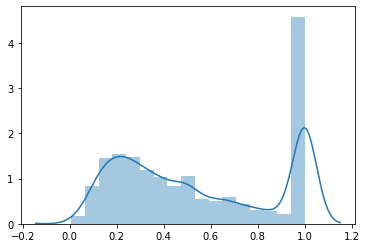

In [8]:
import seaborn as sns
sns.distplot([row[1] for row in l])

In [2]:
df_user_sub[df_user_sub['name'].str.endswith("vim")]

NameError: name 'df_user_sub' is not defined

In [110]:
comment.author.created_utc

1491845612.0

In [116]:
conn.close()
cur.close()

ProgrammingError: Cannot operate on a closed database.

In [131]:
sub = r.submission(id='65adh3')
comment_list = sub.comments.list()
comment_list

[Comment(id='dg8saaq'),
 Comment(id='dg8sda9'),
 Comment(id='dg8qg4k'),
 Comment(id='dgcrhyj'),
 Comment(id='dggjs45'),
 Comment(id='dg9kvn9'),
 Comment(id='dg9th63')]

In [174]:
l[-1]

13875